In [7]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [8]:
#Load data into a dataframe
loan = pd.read_csv("loan.csv")

### Insights from the Data

The dataset for loans has a list of customers who have taken/applied for a loan in the Lending Club. The data can obe broadly classified into 3 categories 
- The information about the customer like his address, employment details, details about his/her house etc
- The information about the loan like loan amount, tenure, reason for loan, approved loan amout, interest rate, 
  status  etc
- The information about the customer behaviour with respect to the loan like revolving balance,     
  delinq_2yrs,revol_util,total_pymnt, next payment etc. 
  
### Problem Statement
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company




Analysing the basic data in the csv (No: of colums, rows, datatypes etc)

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 111)

There are 111 columns while 39717 rows.

In [5]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data Cleansing: 
### Step 1 - Cleaning up columns with many null values
On analysis, it is seen that there are some columns that seems to have null values. Null values in data   does not give any information and if there are more than 60-70% of rows for columns with null data , that can be removed. As we can see below, there are many columns where there are 39717 empty rows.


In [6]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
loan.isnull().all(axis=0).sum()

54

There are 54 columns with empty null values. These needs to be removed

In [8]:
#Remove columns with null values
loan.dropna(axis = 1, how = 'all', inplace = True)

In [9]:
#Checking the data after removing columns
loan.shape

(39717, 57)

In [10]:
loan.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
term                          39717
int_rate                      39717
installment                   39717
grade                         39717
sub_grade                     39717
emp_title                     37258
emp_length                    38642
home_ownership                39717
annual_inc                    39717
verification_status           39717
issue_d                       39717
loan_status                   39717
pymnt_plan                    39717
url                           39717
desc                          26777
purpose                       39717
title                         39706
zip_code                      39717
addr_state                    39717
dti                           39717
delinq_2yrs                   39717
earliest_cr_line              39717
inq_last_6mths              

In [11]:
loan.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

As we can see there are still column mths_since_last_delinq with very few values. This can be removed too.

In [12]:
loan = loan.drop(['mths_since_last_delinq' ], axis=1)

In [13]:
loan.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
term                          39717
int_rate                      39717
installment                   39717
grade                         39717
sub_grade                     39717
emp_title                     37258
emp_length                    38642
home_ownership                39717
annual_inc                    39717
verification_status           39717
issue_d                       39717
loan_status                   39717
pymnt_plan                    39717
url                           39717
desc                          26777
purpose                       39717
title                         39706
zip_code                      39717
addr_state                    39717
dti                           39717
delinq_2yrs                   39717
earliest_cr_line              39717
inq_last_6mths              

Columns with empty or very less values are deleted.

## Data Cleansing: 
### Step 2:  Removing all insignificant columns

There are some columns like url, desc etc that do not give much insights. These can be removed. Also there are columns like delinq_2yrs,earliest_cr_line, inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc, out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries, collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type which describe the loan behaviour columns. These dont provide us insights either for our problem statement of identifying the risk of giving loans to a new customer. These can be removed as well

In [14]:
loan = loan.drop(['url','desc','title' ], axis=1)

In [15]:
loan = loan.drop(['mths_since_last_record','next_pymnt_d','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis =1)


In [16]:
loan.shape

(39717, 30)

## Data Cleansing: 
### Step 3:  Removing Rows

The problem statement is to use the data and arrive at an inight for a new customer as to whether a loan could be offered.
So, the data required is of all customers who have either paid or defaulted for us to take the decision. 
All customers who have an ongoing loan can be ignored as they already have the loan in progress (ie the loan_status equal to Current)

In [17]:
loan["id"][loan['loan_status'] == 'Current'].count()

1140

There are 1140 customers having an ongoing loan. These customers data can be removed.

In [18]:
loan = loan[loan['loan_status'] != 'Current']

In [19]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,AZ,11.20,f,0.0,1,0,0.0,0,0.0,0.0


In [20]:
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2386
emp_length                    1033
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
initial_list_status              0
collections_12_mths_ex_med      56
policy_code                      0
acc_now_delinq                   0
chargeoff_within_12_mths        56
delinq_amnt                      0
pub_rec_bankruptcies

In [21]:
loan['emp_length'].describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

The data clearly shows that the mode(highest occurence) for this data is 10+ years and other data's are all almost only occuring half of it. So, in case we needed to impute data, we can replace missing values with 10+. But for the analysis, we dont replace them.


In [22]:
loan['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [23]:
loan['emp_title'].describe()

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

The data has alot of unique values and is also categorical , we can stay with the current data set.


## Data Cleansing Summary that

The summary of steps we did above to cleanse the data is as stated below

1. Removed columns with all null Values and maximum null Values
2. Removed columns that were insignificant to the analysis 
3. Removed rows containing the loan status as Current
4. Cleaning the columns values. For eg: removing % from int_rate,

In [24]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,AZ,11.20,f,0.0,1,0,0.0,0,0.0,0.0


In [25]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [9]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

#### Adding new columns in the data set
Add Month Column to see patterns using month 


In [11]:
loan_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=loan_month_year[0]                       
loan['issue_year']='20' + loan_month_year[2]

### Data Analysis 

#### Univariate Analysis



Checking outliers for some key numerical fields 
annual_inc ,funded_amnt_inv,loan_amount, int_rate, installment


Oultier for Annual Income

<AxesSubplot:xlabel='annual_inc'>

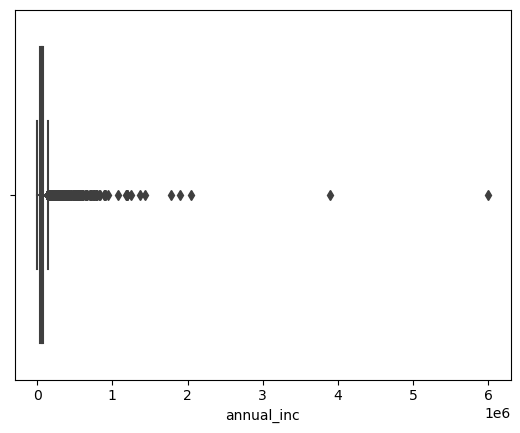

In [26]:
sns.boxplot(loan['annual_inc'])

In [27]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [28]:
loan['annual_inc'].quantile([0.8,0.90, 0.95, 0.97,0.98, 0.99, 1])


0.80      90000.0
0.90     115000.0
0.95     140004.0
0.97     165000.0
0.98     187000.0
0.99     234144.0
1.00    6000000.0
Name: annual_inc, dtype: float64

The values from 99th percentile seems to be increasung rapidly for the small variation in percentile. So, the data from 99th percentile can be removed.

In [29]:
loan["annual_inc"].quantile(0.99)

234143.99999999878

In [30]:
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]

<AxesSubplot:xlabel='annual_inc'>

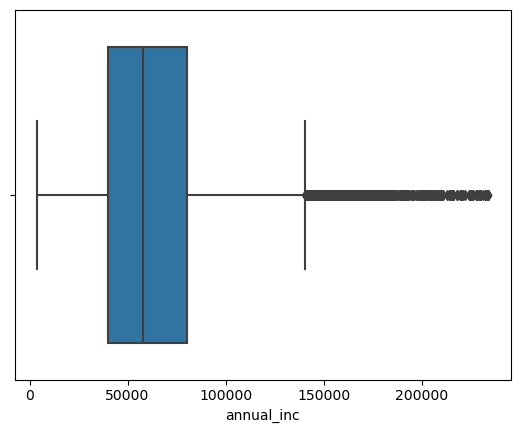

In [31]:
sns.boxplot(loan['annual_inc'])

The box plot for loan amount looks better now for annual income

Outlier for funded_amnt_inv



<AxesSubplot:xlabel='loan_amnt'>

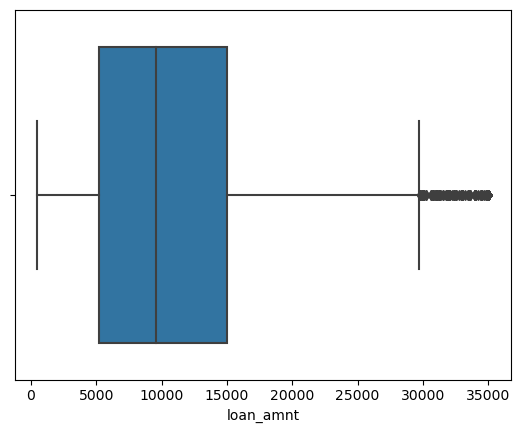

In [32]:
sns.boxplot(loan['loan_amnt'])

In [33]:
loan['loan_amnt'].describe()

count    38191.000000
mean     10962.265979
std       7266.157660
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The data looks fine.

In [34]:
loan['int_rate'].dtypes

dtype('O')

In [35]:
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38191, dtype: object

Since this is of type object, it needs to be converted to numeric. The % symbol needs to be removed.

In [36]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%').apply(pd.to_numeric)

<AxesSubplot:xlabel='int_rate'>

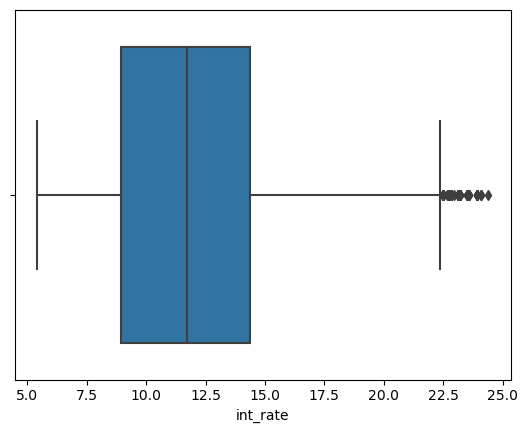

In [37]:
sns.boxplot(loan['int_rate'])

In [38]:
loan['int_rate'].describe()

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='installment'>

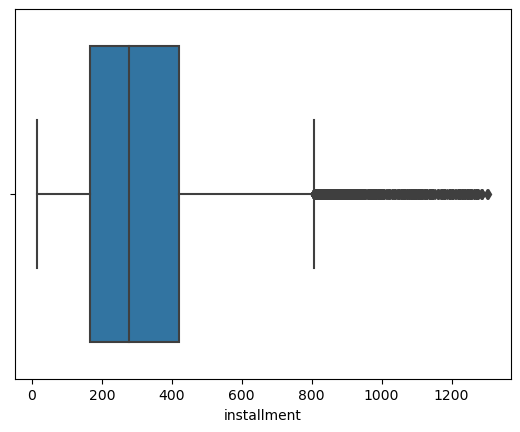

In [39]:
sns.boxplot(loan['installment'])

In [40]:
loan['installment'].describe()

count    38191.000000
mean       319.938941
std        205.948407
min         15.690000
25%        165.380000
50%        276.300000
75%        421.800000
max       1305.190000
Name: installment, dtype: float64

Finding the number of Fully Paid loan and charged off loans


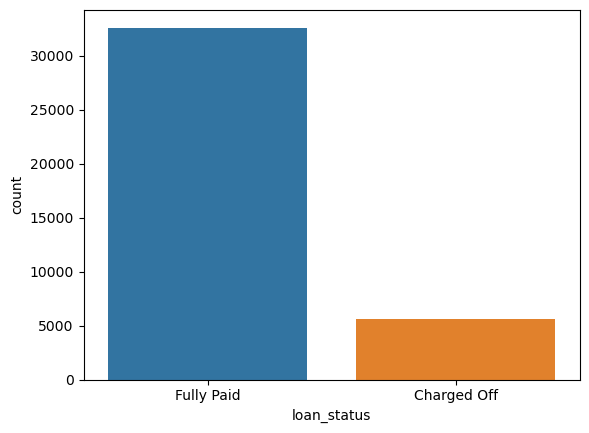

In [41]:
sns.countplot(x="loan_status", data=loan);

Lets analyse now the various factors across the loans to see how loan status is distributed across these factors.

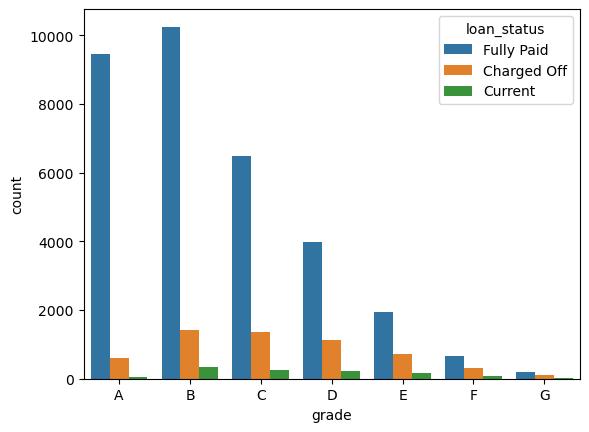

In [30]:
sns.countplot(x="grade",hue='loan_status', data=loan,order = 'ABCDEFG');

The graph shows that the highest grade in which most loans are paid are in Grade B.
Also it shows that most charged off loans are in grade B and grade C. Also, the more loans are taken in higher grades than lower ones.

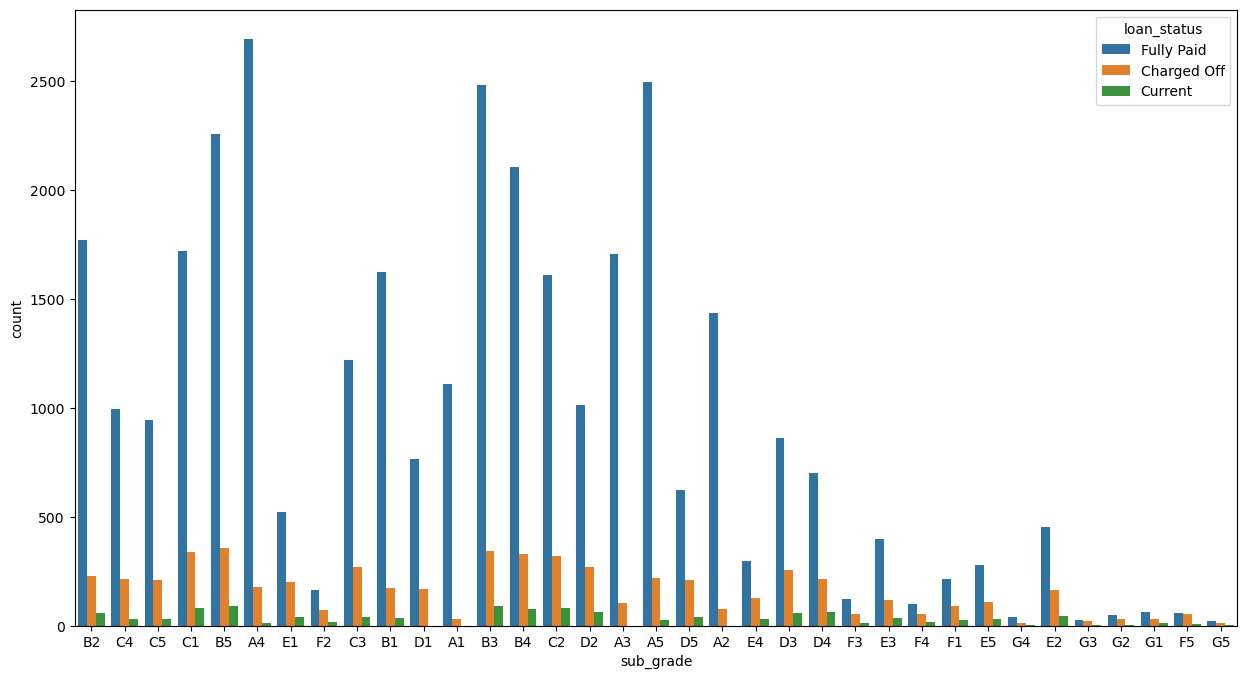

In [32]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="sub_grade",hue='loan_status', data=loan)

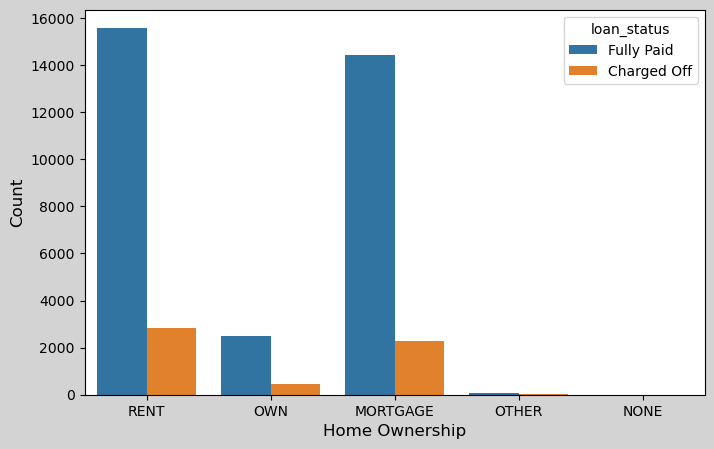

In [43]:
plt.figure(figsize=(8,5),facecolor='lightgrey')
chart = sns.countplot(x="home_ownership",hue="loan_status", data=loan)
chart.set_ylabel('Count',fontsize=12,color = 'black')
chart.set_xlabel('Home Ownership',fontsize=12,color = 'black')      
plt.show()

The graph clearly shows that the loans are taken only by people who either have a rented or mortaged house. And there are more defaulters if the house is rented.

Interest rates and Loan Status

In [44]:
loan['int_rate'].describe()

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

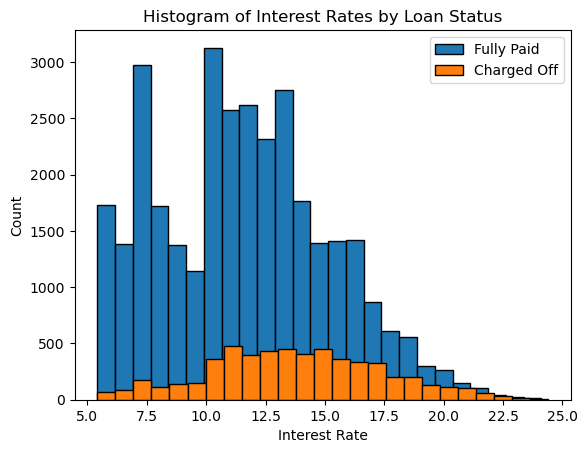

In [45]:
for loan_status in ['Fully Paid', 'Charged Off']:
    loan1 = loan[loan['loan_status'] == loan_status]
    plt.hist(loan1['int_rate'], bins= 25, edgecolor='black',label=loan_status, linewidth=1)

plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Histogram of Interest Rates by Loan Status')
plt.legend()
plt.show()

Interest 10-17.5% seems to be having the most defaulters but this also has the most fully Paid loans. The defaulters are low at lower interest and also at very high interest rate.



In [46]:
loan['annual_inc'].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

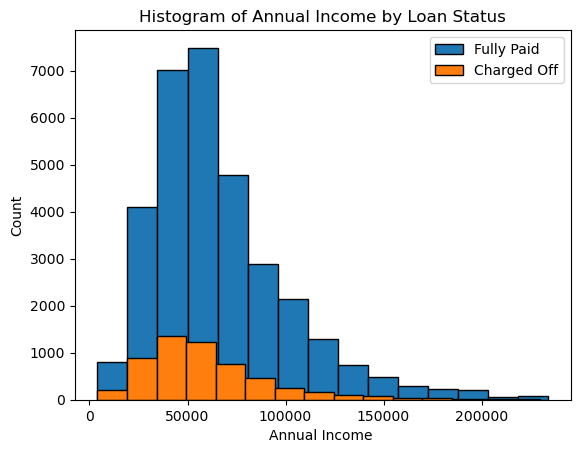

In [47]:
for loan_status in ['Fully Paid', 'Charged Off']:
    loan2 = loan[loan['loan_status'] == loan_status]
    plt.hist(loan2['annual_inc'], bins=15,edgecolor='black', label=loan_status)

plt.xlabel('Annual Income ')
plt.ylabel('Count')
plt.title('Histogram of Annual Income by Loan Status')
plt.legend()
plt.show()

There are more defaulters whose annual income is less than 100000. Lets analyse into only the dataset less than 100000.


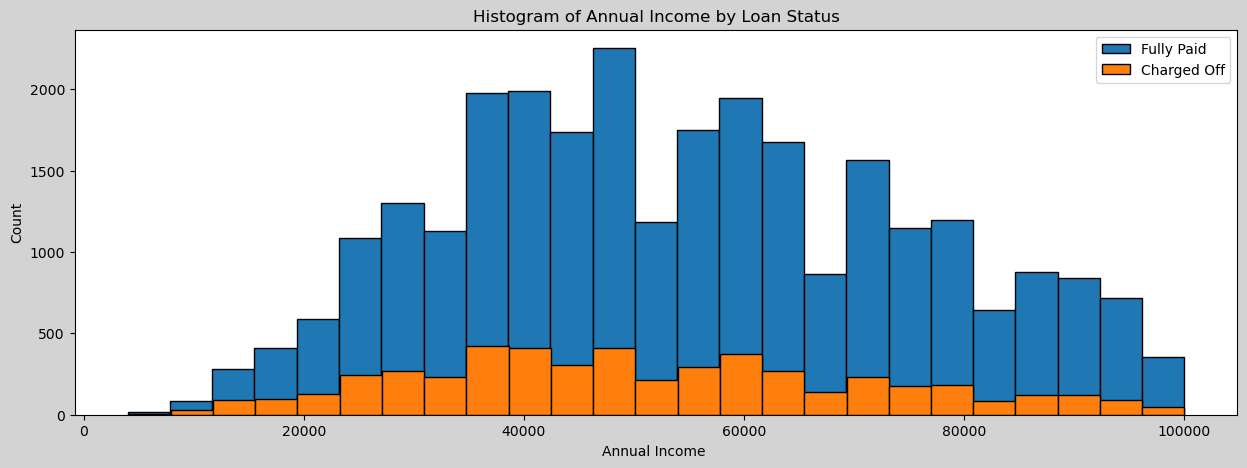

In [48]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
for loan_status in ['Fully Paid', 'Charged Off']:
    loan2_1 = loan[(loan['loan_status'] == loan_status) & (loan['annual_inc'] < 100000)]
    plt.hist(loan2_1['annual_inc'], bins=25,edgecolor='black', label=loan_status)

plt.xlabel('Annual Income ')
plt.ylabel('Count')
plt.title('Histogram of Annual Income by Loan Status')
plt.legend()
plt.show()

The graph clearly indicates the defaulters are in the range of 35000-60000

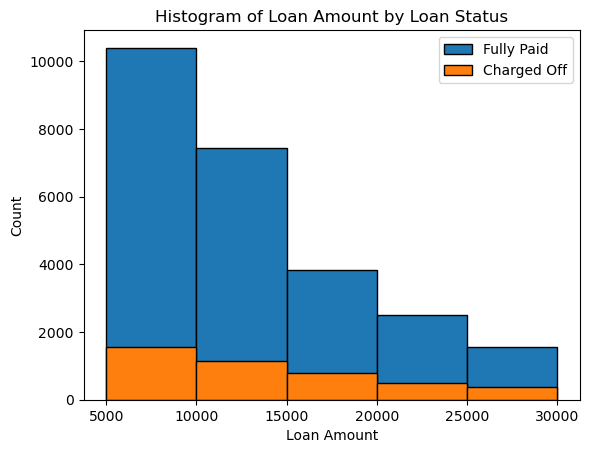

In [49]:
for loan_status in ['Fully Paid', 'Charged Off']:
    loan3 = loan[loan['loan_status'] == loan_status]
    plt.hist(loan3['loan_amnt'], bins=[5000,10000,15000,20000,25000,30000],
             edgecolor='black', label=loan_status)

plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram of Loan Amount by Loan Status')
plt.legend()
plt.show()

As Customers loan amount increases, the chances of repaying and also not seems to be decreasing. But it could also be that the total number of customers also be decresing .

In [50]:
loan['term'] = loan['term'].str.rstrip(' months').apply(pd.to_numeric)

In [51]:
loan['term'].values


array([36, 60, 36, ..., 36, 36, 36])

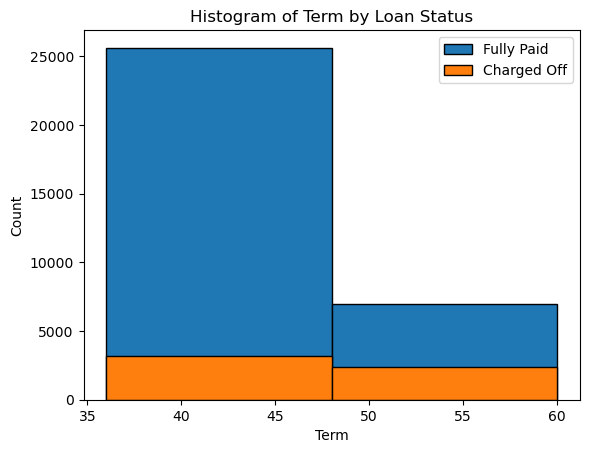

In [52]:
for loan_status in ['Fully Paid', 'Charged Off']:
    loan4 = loan[loan['loan_status'] == loan_status]
    plt.hist(loan4['term'], bins=2,
             edgecolor='black', label=loan_status)

plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Histogram of Term by Loan Status')
plt.legend()
plt.show()

More customers are charged off with a shorter term of 36months than 60 months

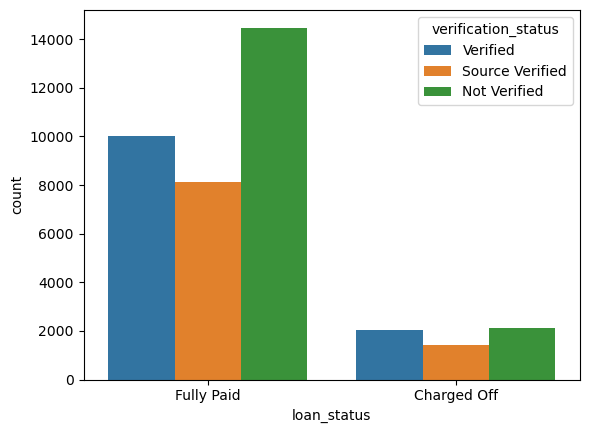

In [53]:
sns.countplot(x="loan_status",hue='verification_status', data=loan);

There is actually minimal difference between Verified and Non verified customers. But Source verified and charged off customers seem to be lesser.


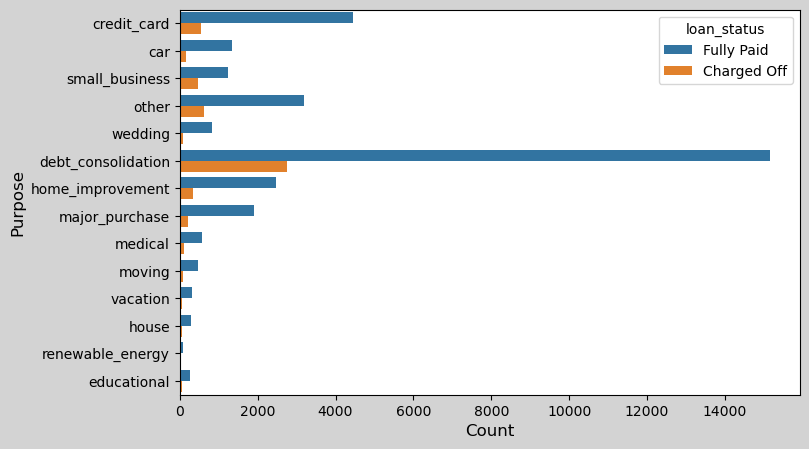

In [54]:
plt.figure(figsize=(8,5),facecolor='lightgrey')
chart = sns.countplot(y="purpose",hue="loan_status", data=loan)
chart.set_ylabel('Purpose',fontsize=12,color = 'black')
chart.set_xlabel('Count',fontsize=12,color = 'black')      
plt.show()

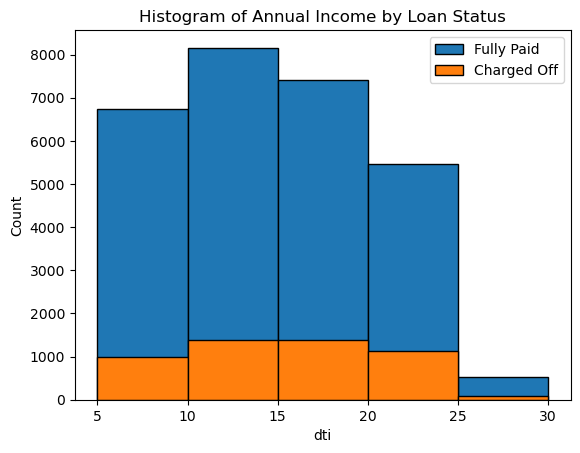

In [55]:
for loan_status in ['Fully Paid', 'Charged Off']:
    loan5 = loan[loan['loan_status'] == loan_status]
    plt.hist(loan5['dti'], bins=[5,10,15,20,25,30],
             edgecolor='black', label=loan_status)

plt.xlabel('dti')
plt.ylabel('Count')
plt.title('Histogram of Annual Income by Loan Status')
plt.legend()
plt.show()

In [56]:
loan['emp_length'].values

array(['10+ years', '< 1 year', '10+ years', ..., '< 1 year', '< 1 year',
       '< 1 year'], dtype=object)

The data in emp_length needs to me modified and converted to numeric.


In [57]:
loan['emp_length'] = loan['emp_length'].str.lstrip('<')

In [58]:
loan['emp_length'] = loan['emp_length'].str.rstrip('+ years').apply(pd.to_numeric)

In [59]:
loan['emp_length'].values

array([10.,  1., 10., ...,  1.,  1.,  1.])

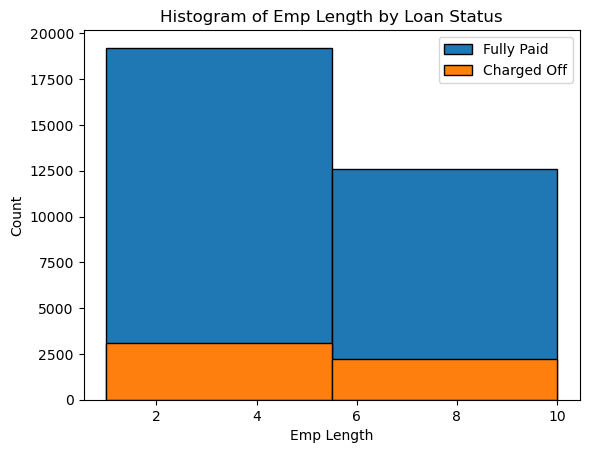

In [60]:
for loan_status in ['Fully Paid', 'Charged Off']:
    loan5 = loan[loan['loan_status'] == loan_status]
    plt.hist(loan5['emp_length'], bins=2,
             edgecolor='black', label=loan_status)

plt.xlabel('Emp Length')
plt.ylabel('Count')
plt.title('Histogram of Emp Length by Loan Status')
plt.legend()
plt.show()

Customers with lower employee tenure seem to default compared to higher tenure.

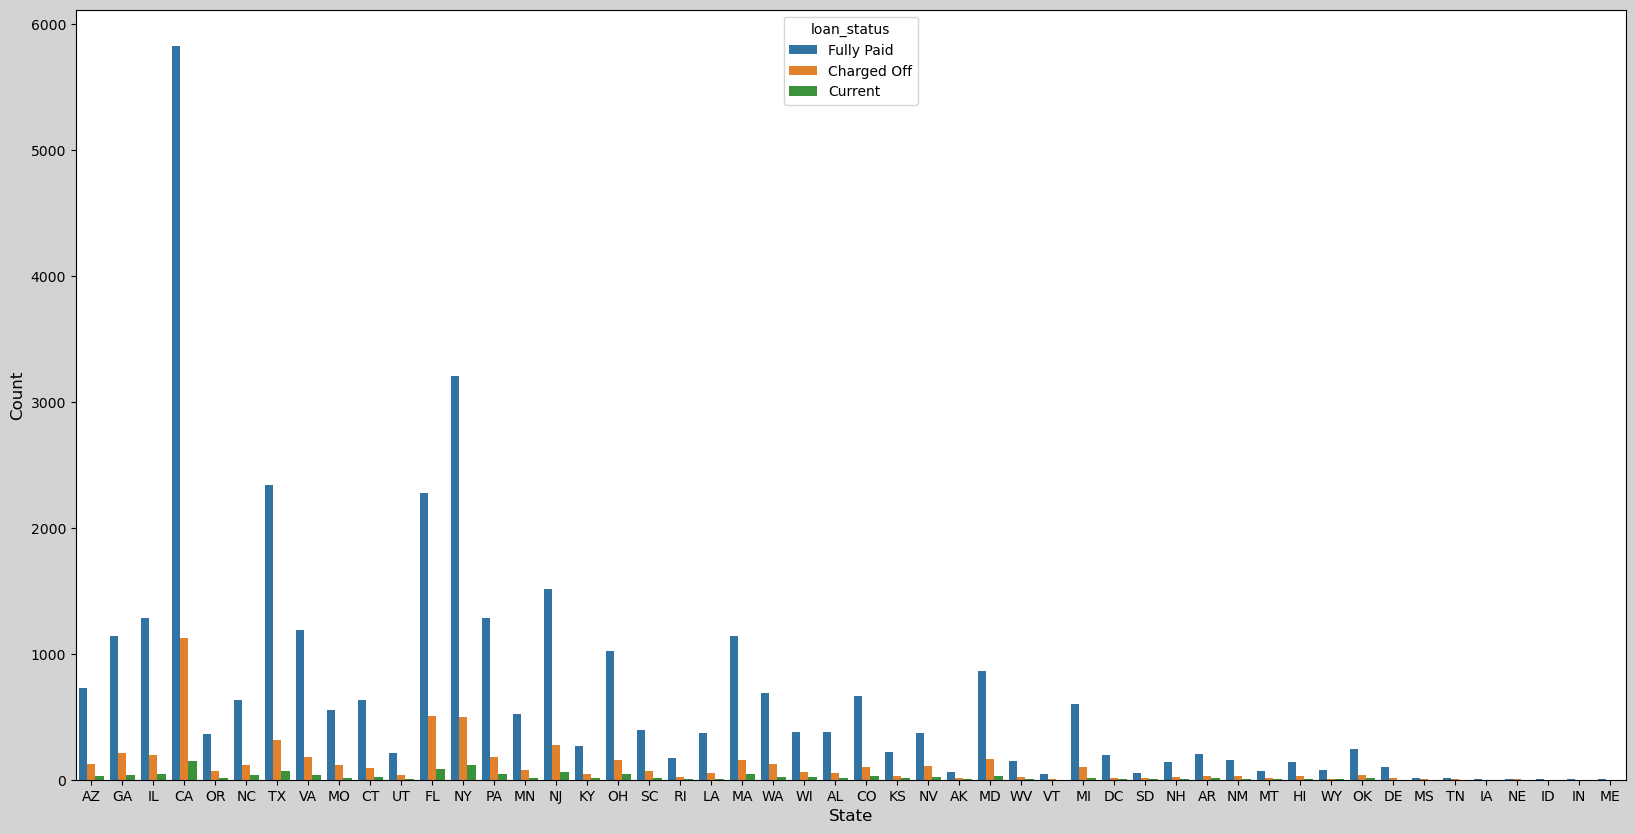

In [33]:
plt.figure(figsize=(20,10),facecolor='lightgrey')
chart = sns.countplot(x="addr_state",hue="loan_status", data=loan)
chart.set_xlabel('State',fontsize=12,color = 'black')
chart.set_ylabel('Count',fontsize=12,color = 'black')      
plt.show()

Customer from CA seem to default more than other States


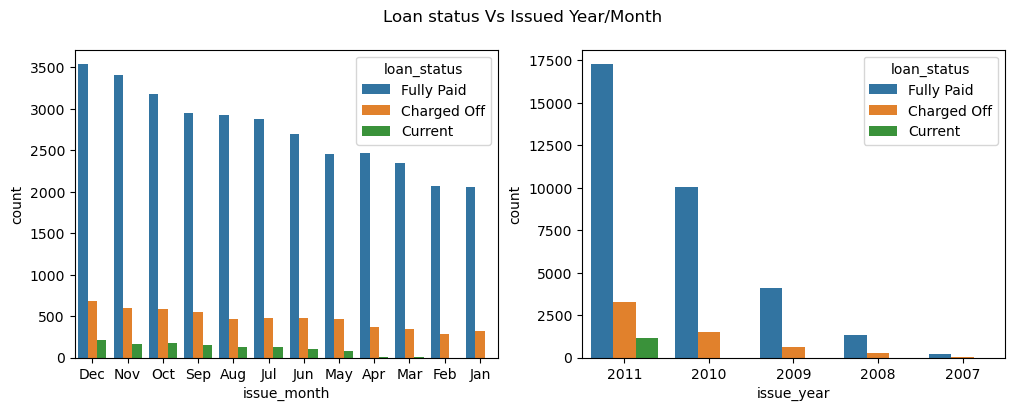

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x="issue_month",hue="loan_status", data=loan)
plt.subplot(1,2,2)
sns.countplot(x="issue_year",hue="loan_status", data=loan)
plt.suptitle('Loan status Vs Issued Year/Month ')
plt.show()

### Univariate Analysis Summary

1. Customers who have taken the loan in Grade B <br>
2. Customers who seem to have a rented house.<br>
3. Customers whose loan is in the range of 10-17.5%<br>
4. Customers whose income range is between 35-60K<br>
5. Customers with lower loan amount are charged off more, but also the total customers are high compared to higher loan amount.<br>
    6. Customers have minimal difference in  Verified and Non verified customers with respect to charge off. <br>But Source verified customers charge off seem to be lesser.<br>
7. Customers who have taken loan for debt consolidation are high in number and so is the fully paid and charged off customers.<br>
8. Customers who have a dti between 10-20 default the most<br>
9. Customers with lower employee tenure seem to default compared to higher tenure.<br>
10. Customer from CA tend to default more
11. Customers who have taken loan in 2011 are more and have also charged off more.
12. Customers have taken more loans in December and with a high chargeoff as well.

One common observation is that in most case, the number of charged off customer high but we can also see that the fully paid customers also seem to be high. So we need to analyse these variables in context of other variables to get more insights. So as next step we will do bivariate analysis.

### Bivariate Analysis

We will do impact on the loan status using the 2 variables - loan_amnt and annual_inc and see how these two variables behave with other variables like grade, home ownership etc

##### Loan Amount vs Other variables

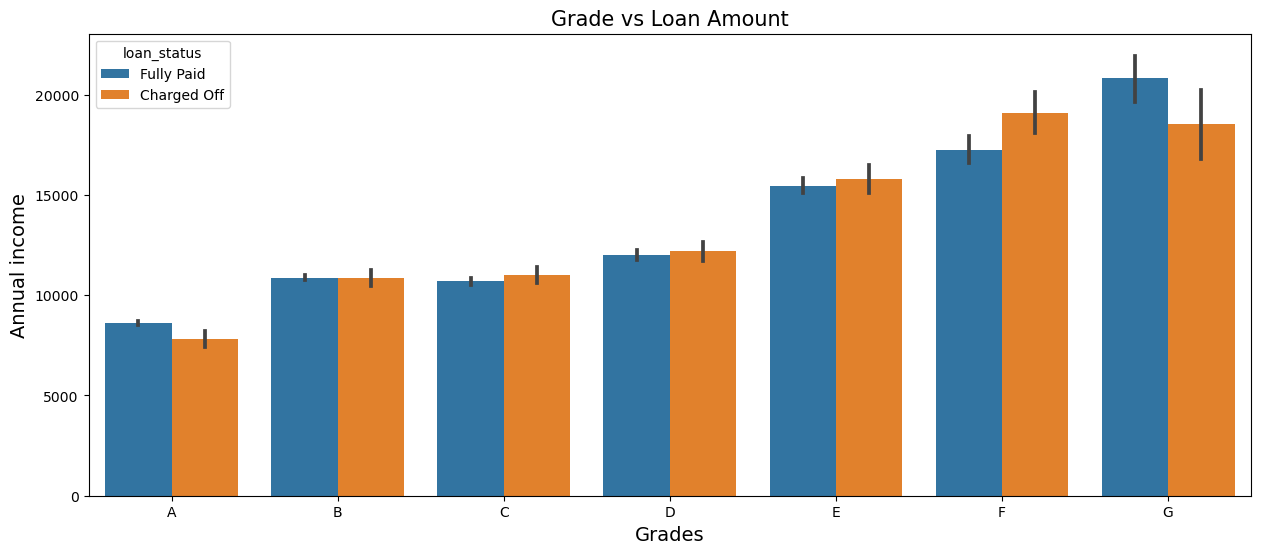

In [88]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Loan Amount',fontsize=15,color='black')
ax.set_ylabel('Annual income',fontsize=14,color = 'black')
ax.set_xlabel('Grades',fontsize=14,color = 'black')

plt.show()

Customers with loan grades F and have an annual income range 15K-20K default more.

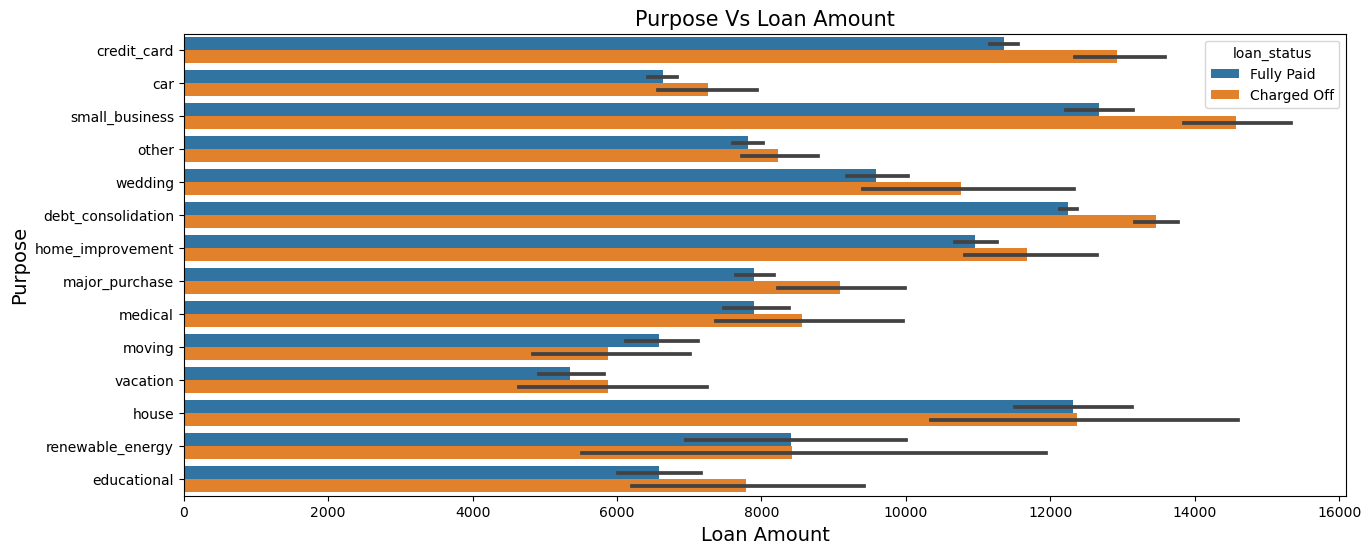

In [62]:
plt.figure(figsize=(15,6))
ax=sns.barplot(y='purpose', x='loan_amnt', hue="loan_status", data=loan)
ax.set_title('Purpose Vs Loan Amount',fontsize=15,color='black')
ax.set_ylabel('Purpose',fontsize=14,color = 'black')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'black')

plt.show()

Customers who have taken a loan for small business and the loan amount is greater than 14k
Customers who have taken a loan for credit card and the loan amount is greater than 12k
Customers who have taken a loan for debt consolidation  and the loan amount is greater than 13k


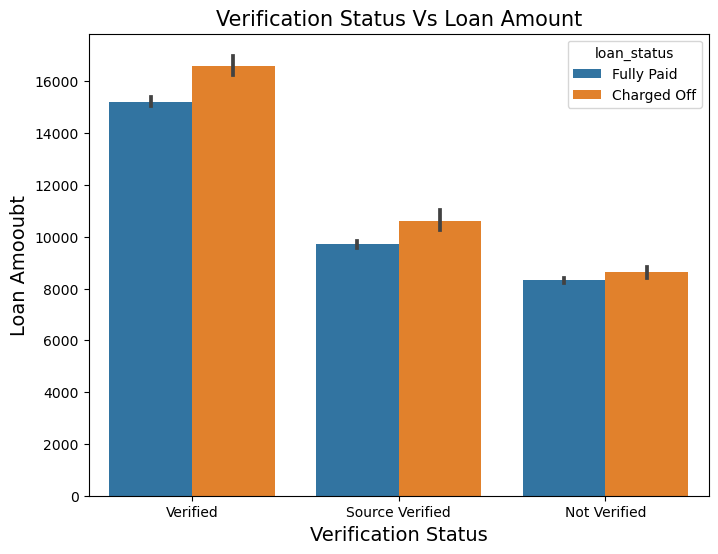

In [81]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan)
ax.set_title('Verification Status Vs Loan Amount',fontsize=15,color='black')
ax.set_ylabel('Loan Amooubt',fontsize=14,color = 'black')
ax.set_xlabel('Verification Status',fontsize=14,color = 'black')

plt.show()

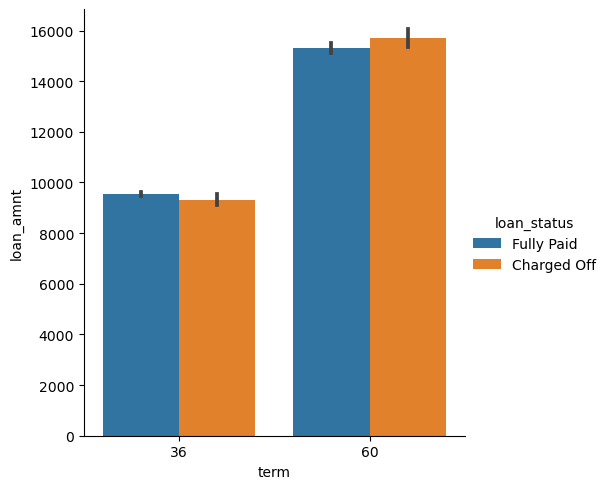

In [64]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

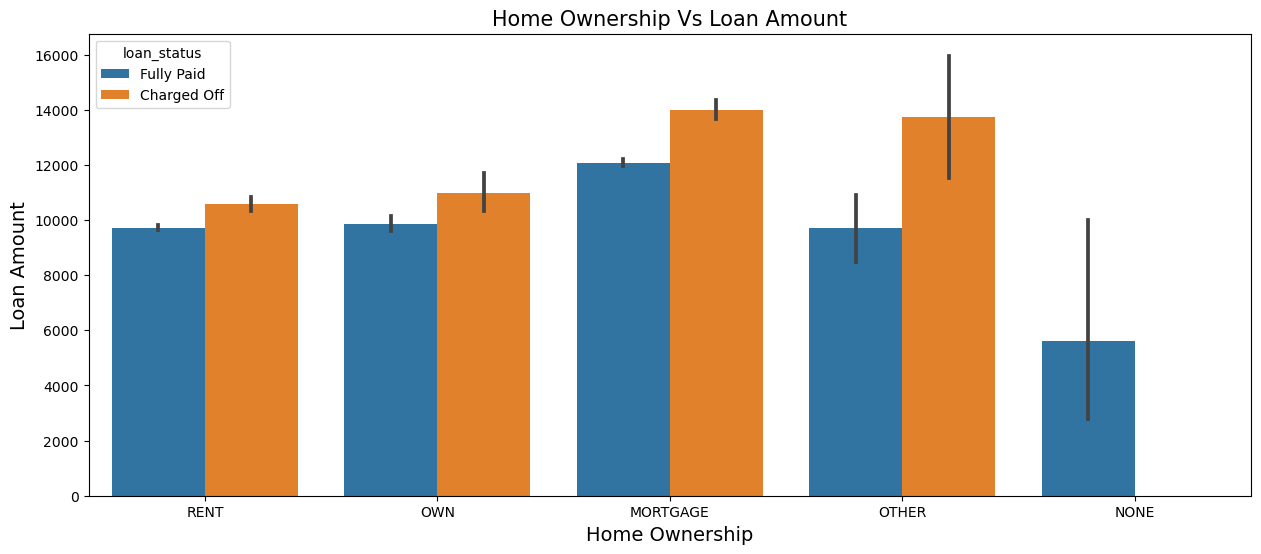

In [93]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='home_ownership', y='loan_amnt', hue="loan_status", data=loan)
ax.set_title('Home Ownership Vs Loan Amount',fontsize=15,color='black')
ax.set_ylabel('Loan Amount',fontsize=14,color = 'black')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'black')

plt.show()

Customers with a mortaged home and has an income around 14K-16K have chances of defualting.

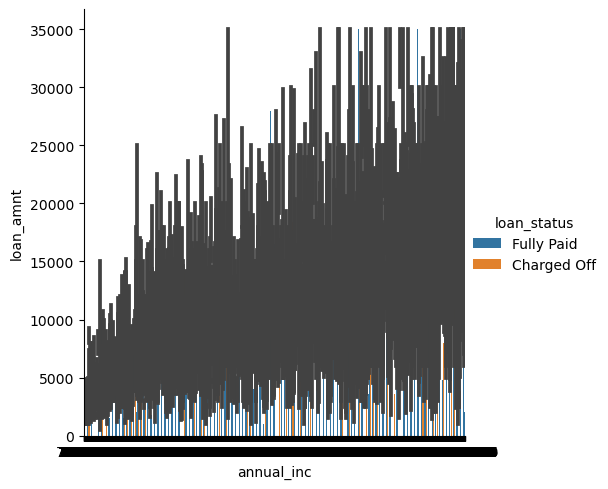

In [65]:
sns.catplot(x = 'annual_inc', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

In [ ]:
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=8,precision =0,labels =['4k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','140K-180K', '180K-200K'])


<Figure size 5000x600 with 0 Axes>

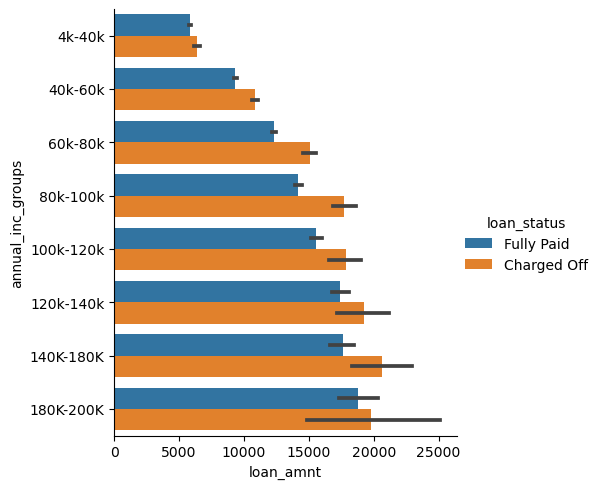

In [78]:
plt.figure(figsize=(50,6))
ax = sns.catplot(y = 'annual_inc_groups', x = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

plt.show()



Customers with higher income above 140K and higher loan amount tend to not pay the loan.

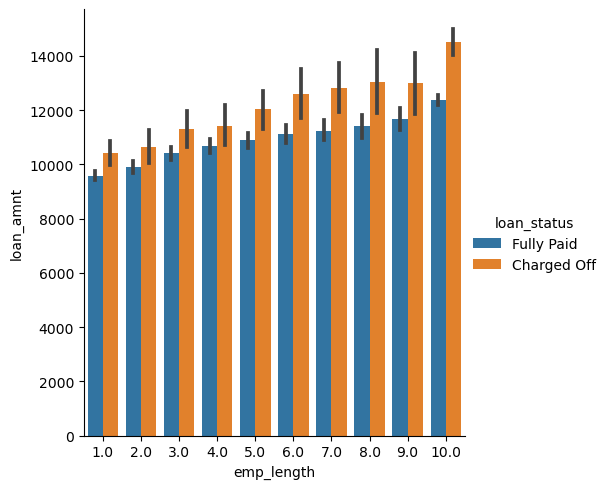

In [83]:
sns.catplot(x = 'emp_length', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

Customers with loan amount greater than 12K with employement tenure greater than 6 years

##### Annual Income vs Other variables

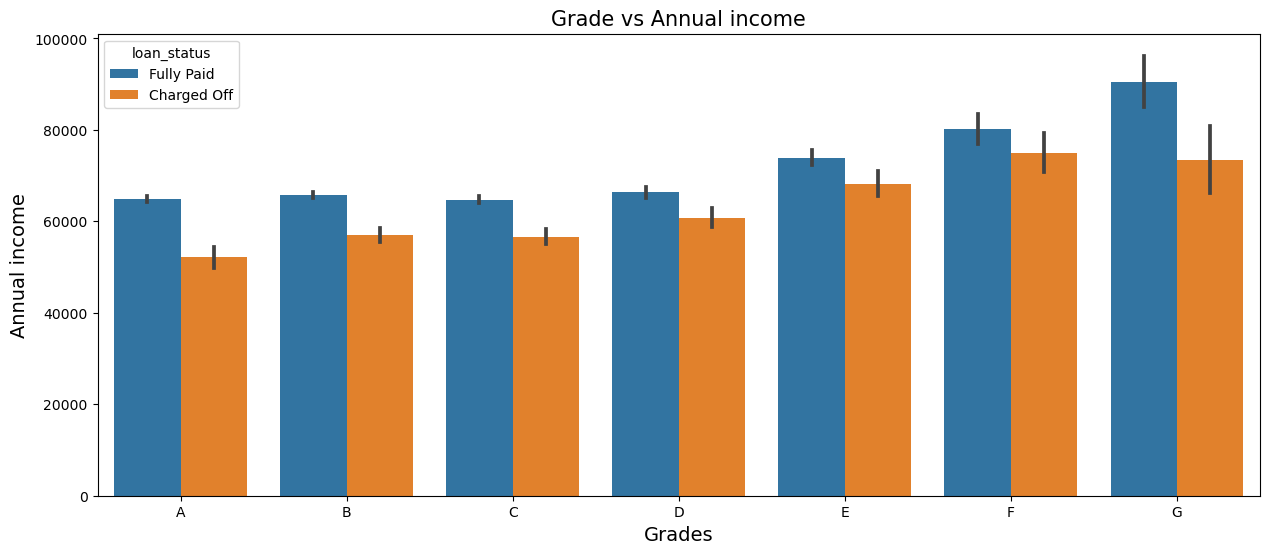

In [95]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='black')
ax.set_ylabel('Annual income',fontsize=14,color = 'black')
ax.set_xlabel('Grades',fontsize=14,color = 'black')

plt.show()

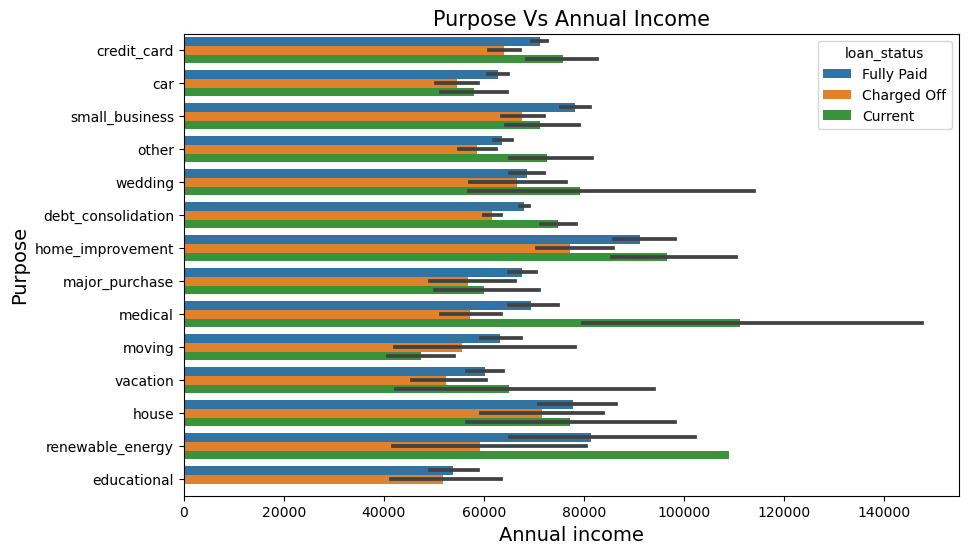

In [36]:
plt.figure(figsize=(10,6))
ax=sns.barplot(y='purpose', x='annual_inc', hue="loan_status", data=loan)
ax.set_title('Purpose Vs Annual Income',fontsize=15,color='black')
ax.set_ylabel('Purpose',fontsize=14,color = 'black')
ax.set_xlabel('Annual income',fontsize=14,color = 'black')

plt.show()

Customers taking loan for home improvement and have income of 60k -70k

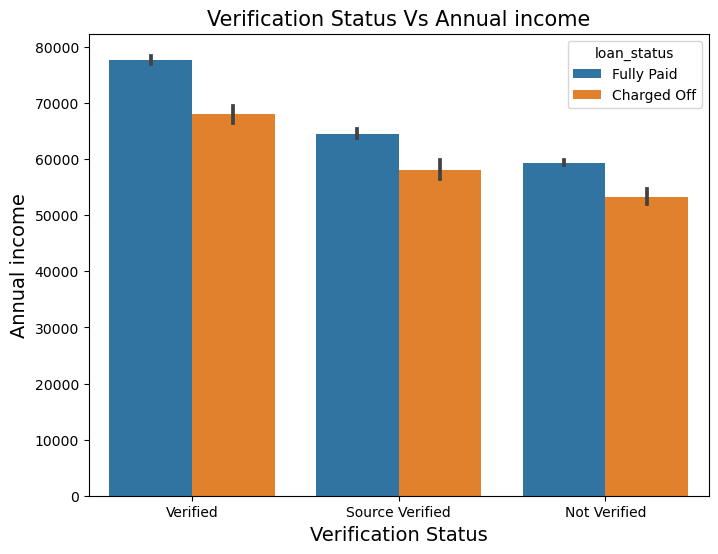

In [96]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='verification_status', y='annual_inc', hue="loan_status", data=loan)
ax.set_title('Verification Status Vs Annual income',fontsize=15,color='black')
ax.set_ylabel('Annual income',fontsize=14,color = 'black')
ax.set_xlabel('Verification Status',fontsize=14,color = 'black')

plt.show()

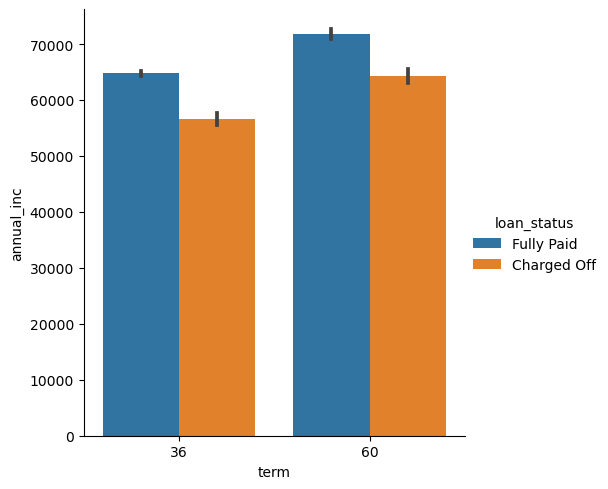

In [97]:
sns.catplot(x = 'term', y = 'annual_inc', data = loan,hue = 'loan_status', kind = 'bar')

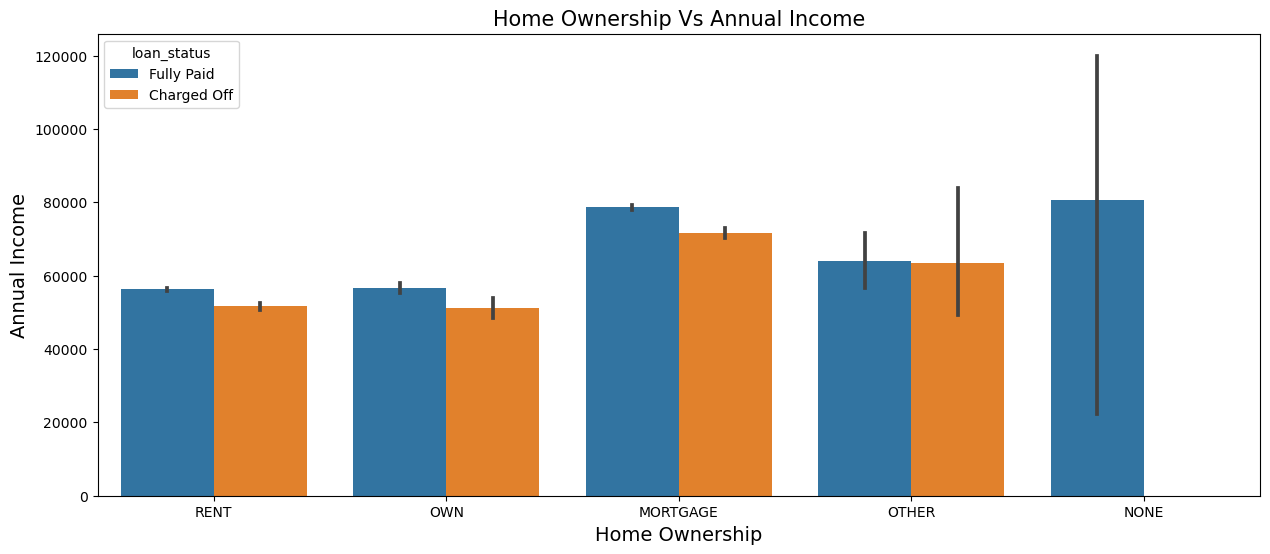

In [99]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='home_ownership', y='annual_inc', hue="loan_status", data=loan)
ax.set_title('Home Ownership Vs Annual Income',fontsize=15,color='black')
ax.set_ylabel('Annual Income',fontsize=14,color = 'black')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'black')

plt.show()

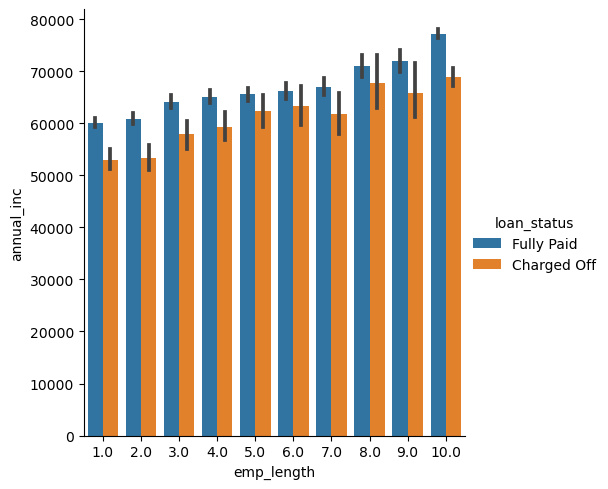

In [100]:
sns.catplot(x = 'emp_length', y = 'annual_inc', data = loan,hue = 'loan_status', kind = 'bar')

##### Interest Rate vs Other variables

In [106]:
loan['interest_groups'] = pd.cut(loan['int_rate'], bins=10,precision =0,labels =['5-7','7-9','9-11','11-13','13-15','15-17','17-19','19-21','21-23','23-25'])


<Figure size 1000x600 with 0 Axes>

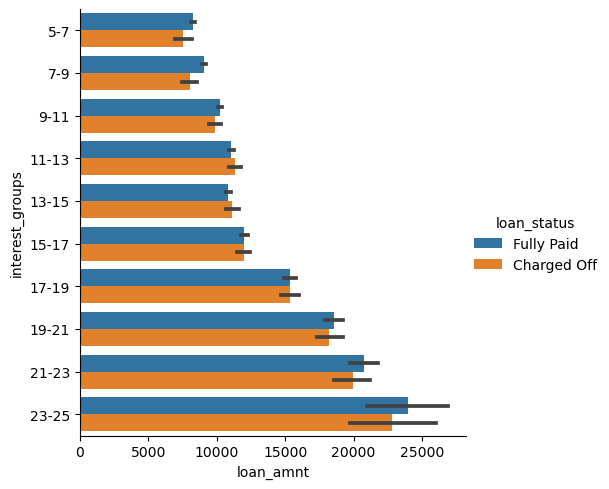

In [110]:
plt.figure(figsize=(10,6))
ax = sns.catplot(y = 'interest_groups', x = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

plt.show()


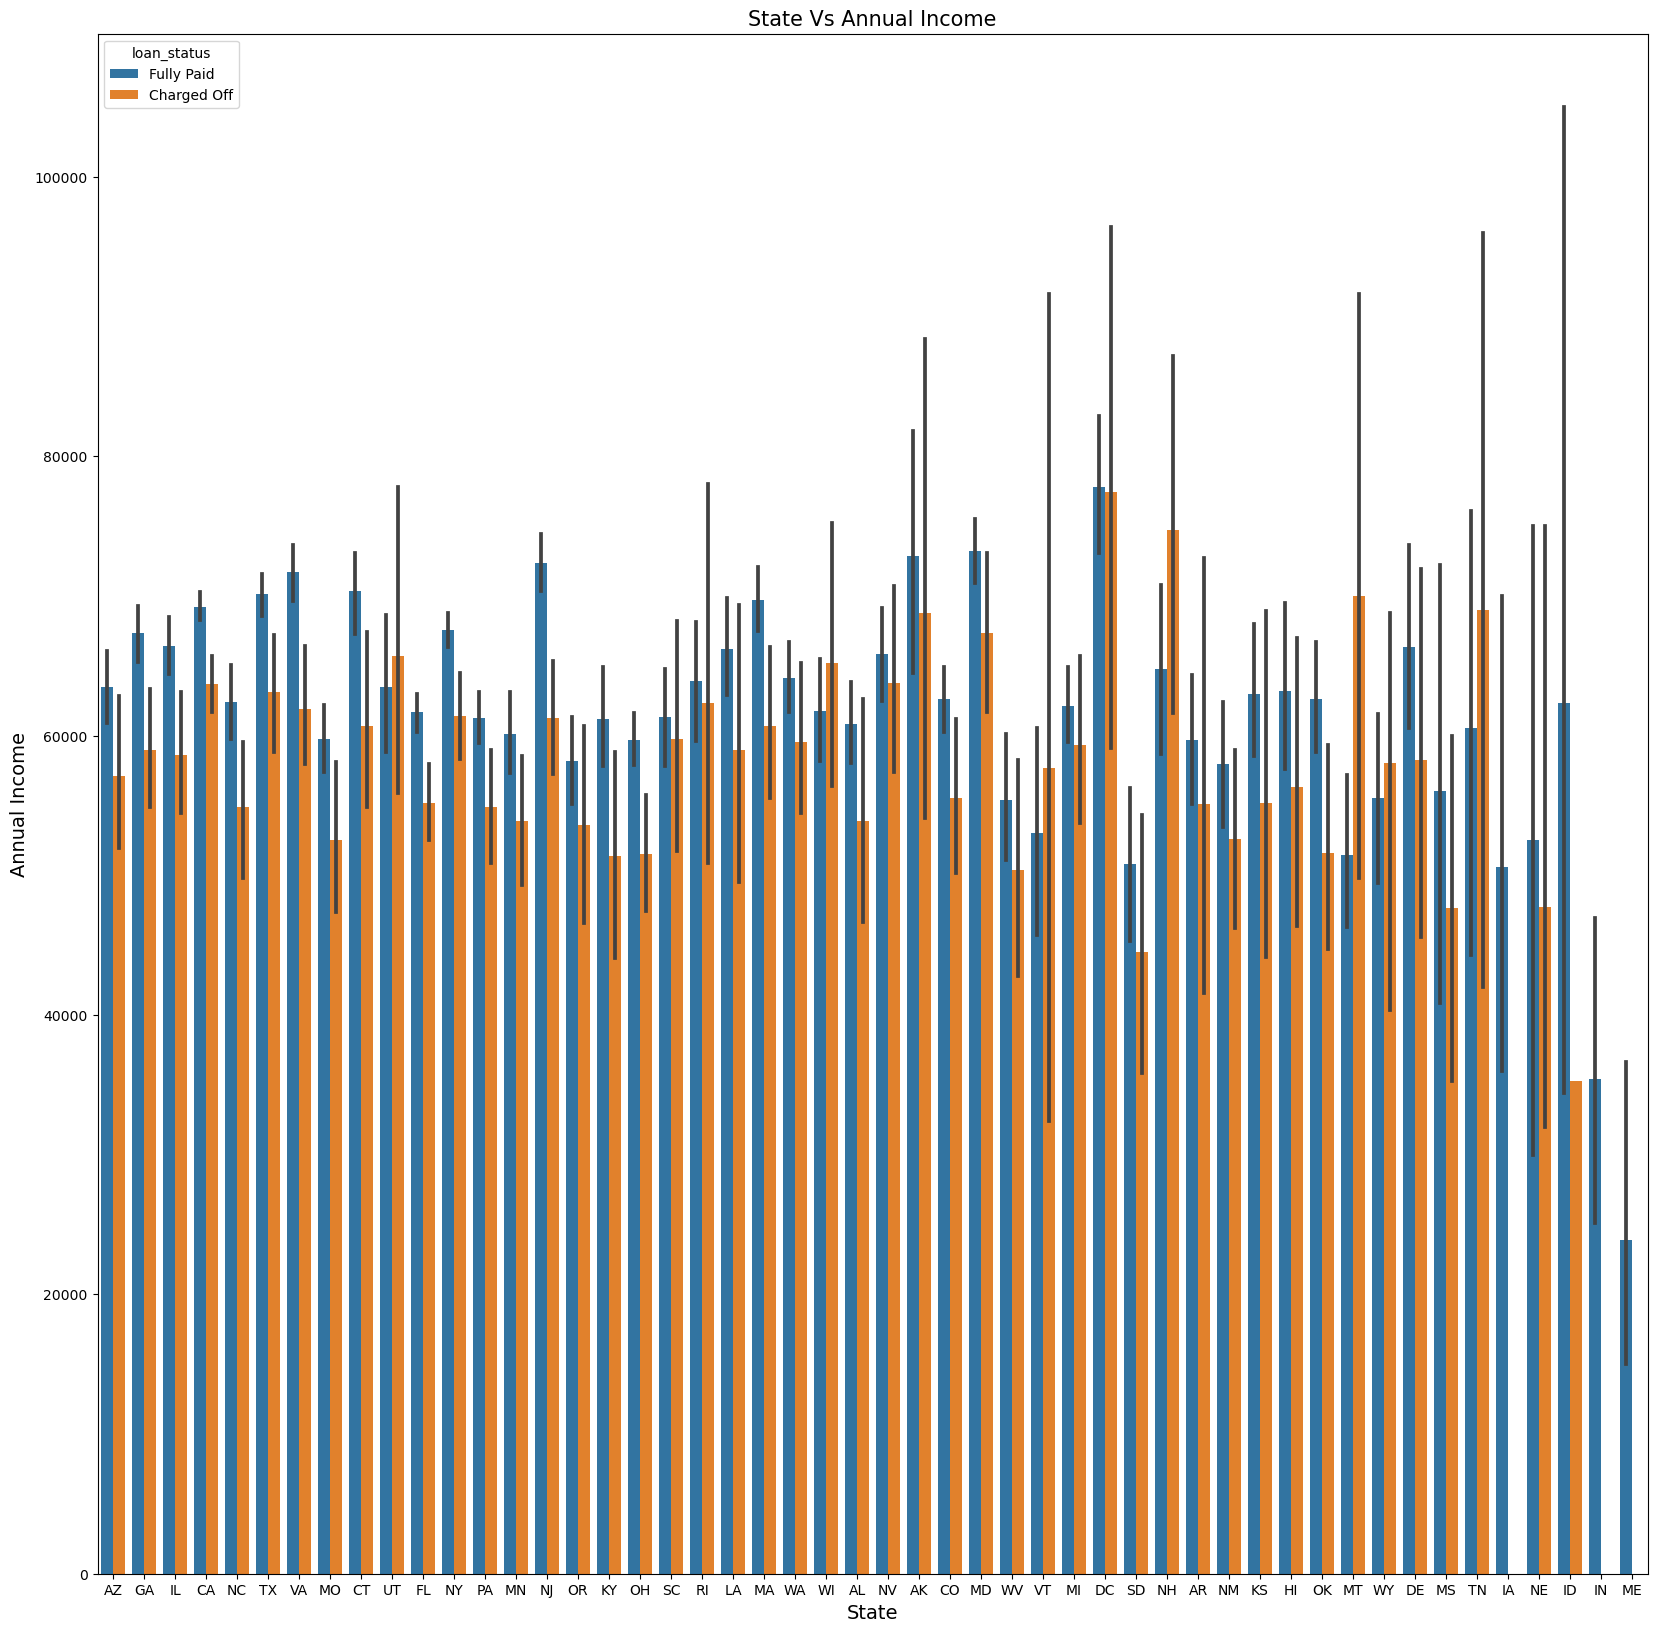

In [116]:
plt.figure(figsize=(20,20))
ax=sns.barplot(x='addr_state', y='annual_inc', hue="loan_status", data=loan)
ax.set_title('State Vs Annual Income',fontsize=15,color='black')
ax.set_ylabel('Annual Income',fontsize=14,color = 'black')
ax.set_xlabel('State',fontsize=14,color = 'black')

plt.show()

#### BIvariate Analysis Summary
 Customers with the following behavioural aspects tend to be charged off . 

1. Customers with loan grades F and have an annual income range 15K-20K 
2. Customers who have taken a loan for small business/ credit card /debt consolidation and the loan amount is in the range 12k-16k
3. Customer with Verified status and have higher loan amounts greater than 16K 
4. Customers with a mortaged home and has an income around 14K-16K 
5. Customers with higher income above 140K and higher loan amount 
6. Customers with loan amount greater than 12K with employment tenure greater than 6 years
7. Customers taking loan for home improvement and have income of 60k -70k